In [1]:
### Initialize functions
import importlib as imp
import Functions as func
imp.reload(func)
import re

### 1. Patient selection

#### Select patients according to ICD codes

In [ ]:
import pandas as pd
import numpy as np

# ICD10 Codes to select RA population 
l_RA = ['Rheumatoid arthritis with rheumatoid factor, unspecified', 'Rheumatoid arthritis, unspecified', 'Rheumatoid arthritis without rheumatoid factor', 'Rheumatoid vasculitis with rheumatoid arthritis',  'Rheumatoid lung disease with rheumatoid arthritis']
l_RA_codes = ['M06.99', 'M06.09', 'M05.99', 'M06.90', 'M05.29', 'M05.19+']

# Also get ICD codes to select OA population
df_oa = pd.read_csv('../suppl/OA_codes.csv', sep= '|')
l_OA_codes = list(df_oa['ICD10code'])
l_OA = list(df_oa['desc'])

# Create dictionary to map ICD to diagnosis
df_code_desc = pd.read_csv('../suppl/mapped_icd_desc.csv', sep='|')
d_map_icd = dict(zip(df_code_desc.ICD10code, df_code_desc.desc))

# Import table with ICD codes
df_icd= pd.read_csv('../data/ZWN_DiagnoseICD.csv', sep='|')
df_add =pd.read_csv('../data/20240312_addendum/ZWN_diagnoseICD.csv', sep=',')
df_add= df_add.dropna(subset=['StartDatum']).reset_index(drop=True)
df_icd= pd.concat([df_icd, df_add])
df_icd = df_icd.drop_duplicates()

# Drop rows with missing icd
df_icd['ICD10code'] = df_icd['ICD10code'].replace('     ', np.nan) # DiagnoseCode 306 doesnt have an ICD10 equivalent
df_icd = df_icd.dropna(subset=['ICD10code'])
df_icd['ICD10desc'] = df_icd['ICD10code'].apply(lambda x : d_map_icd[x])
df_icd

In [ ]:
df_OA_final = df_icd[df_icd['Identifier'].isin(l_pat_OA)].sort_values(by='EindDatum').drop_duplicates(subset='Identifier', keep='last')#['ICD10code']#.plot()
df_OA_final[df_OA_final['ICD10code']=='M19.99']

In [ ]:
df_FMS_final = df_icd[df_icd['Identifier'].isin(l_pat_FMS)].sort_values(by='EindDatum').drop_duplicates(subset='Identifier', keep='last')#['ICD10code']#.plot()
df_FMS_final#[df_FMS_final['ICD10code']=='M19.99']

In [ ]:
df_RA_final = df_icd[df_icd['Identifier'].isin( df_RA['Identifier'])].sort_values(by='EindDatum').drop_duplicates(subset='Identifier', keep='last')

df_RA_final[df_RA_final['ICD10code']=='M15.9']

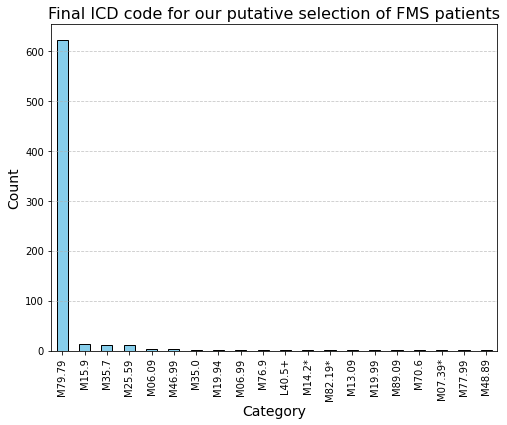

In [120]:
# Count the occurrences of each category
category_counts =  df_icd[df_icd['Identifier'].isin(l_pat_FMS)].sort_values(by='EindDatum').drop_duplicates(subset='Identifier', keep='last')['ICD10code'].value_counts()

# Plot the bar chart with additional customizations
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Final ICD code for our putative selection of FMS patients', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [ ]:
df_RA_final =  df_icd[df_icd['Identifier'].isin(df_RA['Identifier'])].sort_values(by='EindDatum').drop_duplicates(subset='Identifier', keep='last')
df_RA_final[df_RA_final['ICD10code']=='M19.94']

### 1.1 Select RA patients

In [ ]:
df_subicd = df_icd[df_icd['ICD10desc'].isin(l_RA)].sort_values(by='StartDatum').drop_duplicates(subset=['Identifier']).copy()
d_RA_first = dict(zip(df_subicd['Identifier'], df_subicd['StartDatum']))
d_RA_first

In [20]:
l_pat_RA = list(df_icd[df_icd['ICD10desc'].isin(l_RA)]['Identifier'].unique())
print('Nr of RA patients (ICD10):', len(l_pat_RA))

# Export to csv
df_RA = pd.DataFrame(l_pat_RA, columns=['Identifier'])
df_RA['Date_first'] = df_RA['Identifier'].apply(lambda x : d_RA_first[x])
df_RA.to_csv('../dict/list_ra_patients_icd.csv', sep=';', index=None)

Nr of RA patients (ICD10): 1543


In [21]:
print('On average we have %.2f codes per patient' % (len(df_icd)/len(df_icd['Identifier'].unique())))
print('In RA we have %.2f codes per patient' % (len(df_icd[df_icd['Identifier'].isin(l_pat_RA)])/len(df_icd[df_icd['Identifier'].isin(l_pat_RA)]['Identifier'].unique())))

On average we have 5.17 codes per patient
In RA we have 11.90 codes per patient


#### [Extra] Select fibromyalgia patients

In [115]:
l_pat_FMS = list(df_icd[df_icd['ICD10code'].isin(['M79.79'])]['Identifier'].unique())
print('Nr of Fibromyalgia patients (ICD10):', len(l_pat_FMS))

# Export to csv
pd.DataFrame(l_pat_FMS, columns=['Identifier']).to_csv('../dict/list_fms_patients_icd.csv', sep=';', index=None)

Nr of Fibromyalgia patients (ICD10): 681


#### [Extra] Select OA patients

In [103]:
l_pat_OA = list(df_icd[df_icd['ICD10code'].isin(l_OA_codes)]['Identifier'].unique())

In [23]:
l_pat_OA = list(df_icd[df_icd['ICD10code'].isin(l_OA_codes)]['Identifier'].unique())
print('Nr of Osteoarthritis patients (ICD10):', len(l_pat_OA))

# Export to csv
pd.DataFrame(l_pat_OA, columns=['Identifier']).to_csv('../dict/list_oa_patients_icd.csv', sep=';', index=None)

Nr of Osteoarthritis patients (ICD10): 2918


#### [Extra] Select Arthralgia patients

In [24]:
l_pat_Arthralgia = list(df_icd[df_icd['ICD10code'].isin(['M25.59'])]['Identifier'].unique())
print('Nr of Arthralgia patients (ICD10):', len(l_pat_Arthralgia))

# Export to csv
pd.DataFrame(l_pat_Arthralgia, columns=['Identifier']).to_csv('../dict/list_arthralgia_patients_icd.csv', sep=';', index=None)

Nr of Arthralgia patients (ICD10): 2449


### 1.2 Identify first date of diagnosis

In [25]:
df_RA =  df_icd[df_icd['ICD10desc'].isin(l_RA)].sort_values(by='StartDatum')
df_RA = df_RA.drop_duplicates(subset=['Identifier'], keep='first')
d_firstDiagnosis = dict(zip(df_RA['Identifier'], df_RA['StartDatum']))

## 2 Create Baseline table

### 2.1 get date of first & last consult

In [26]:
import pandas as pd
df_app = pd.read_csv('../data/ZWN_afspraak.csv', sep=',')
df_firstConsult = df_app[((df_app['Eerste_Afspraak']=='Ja'))]
df_lastConsult = df_app[((df_app['Laatste_Afspraak']=='Ja'))]

# Collect all first Consult dates
d_firstConsult = dict(zip(df_firstConsult['Identifier'], df_firstConsult['Datum']))
#d_firstDiagnosis = dict(zip(df_firstConsult['Identifier'], df_firstConsult['StartDatum']))
#d_firstDiagnosis = dict(zip(df_firstConsult['Identifier'], df_firstConsult['Datum']))

# Collect all final Consult dates
d_lastConsult = dict(zip(df_lastConsult['Identifier'], df_lastConsult['Datum']))

# Collect number of visits
df_visits = pd.DataFrame(df_app['Identifier'].value_counts()).reset_index()
d_visits = dict(zip(df_visits['index'], df_visits['Identifier']))

#### Render histogram to display first year of inclusion

/exports/reum/tdmaarseveen/custom_environment/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

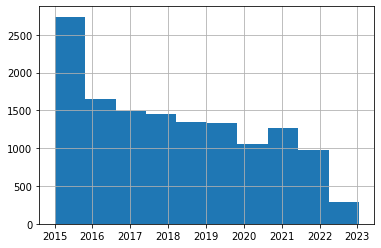

In [27]:
df_firstConsult['Datum'] = pd.to_datetime(df_firstConsult['Datum'],format='%Y-%m-%d')#.hist()
df_firstConsult['Datum'].hist()

### 2.2 create baseline table
We use the demographics table as a starting point. We add the first and last consult to this data.

In [28]:
df_demograph =pd.read_csv('../data/20240312_addendum/ZWN_leeftijd_en_geslacht.csv', sep=',')
df_demograph['Identifier'] = df_demograph['Identifier'].apply(lambda x: x.lower().replace('{', '').replace('}', ''))
#df_demograph =pd.read_csv('../data/ZWN_leeftijd_en_geslacht.csv', sep=',')

# ToDo: Fix once we get 2023 extraction of Afspraken!
# Add first and last consult information
df_demograph['FirstConsult'] = df_demograph['Identifier'].apply(lambda x : d_firstConsult[x] if x in d_firstConsult.keys() else np.nan)
df_demograph['LastConsult'] = df_demograph['Identifier'].apply(lambda x : d_lastConsult[x]  if x in d_firstConsult.keys() else np.nan)

# Calculate follow up 
df_demograph['FirstConsult'] = pd.to_datetime(df_demograph['FirstConsult'], format='%Y-%m-%d')
df_demograph['LastConsult'] = pd.to_datetime(df_demograph['LastConsult'], format='%Y-%m-%d')
df_demograph['FollowUp'] = df_demograph['LastConsult'] - df_demograph['FirstConsult'] 
df_demograph['FollowUp'] = df_demograph['FollowUp'].dt.days

# Save follow up as dictionary
d_followUp = dict(zip(df_demograph['Identifier'], df_demograph['FollowUp']))

# ToDo: Fix once we get 2023 extraction of Afspraken!
# Get number of visits
df_demograph['Visits'] = df_demograph['Identifier'].apply(lambda x : d_visits[x] if x in d_visits.keys() else np.nan)

# Add date of diagnosis (according to codes)
df_demograph['FirstDiagnosis'] = df_demograph['Identifier'].apply(lambda x : d_firstDiagnosis[x] if x in d_firstDiagnosis.keys() else np.nan)


In [29]:
l_RA

['Rheumatoid arthritis with rheumatoid factor, unspecified',
 'Rheumatoid arthritis, unspecified',
 'Rheumatoid arthritis without rheumatoid factor',
 'Rheumatoid vasculitis with rheumatoid arthritis',
 'Rheumatoid lung disease with rheumatoid arthritis']

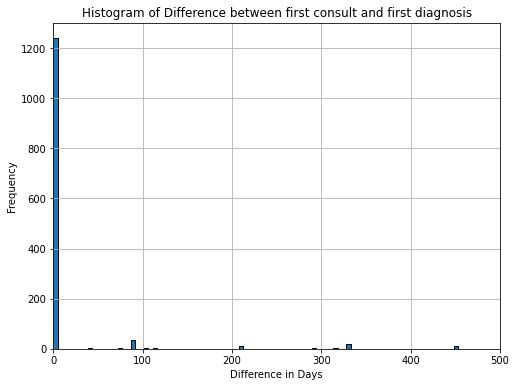

In [30]:
import matplotlib.pyplot as plt
df_demograph[df_demograph['Identifier'].isin(l_pat_RA)][['FirstConsult', 'FirstDiagnosis']]

# Convert date columns to datetime format
df_demograph['FirstConsult'] = pd.to_datetime(df_demograph['FirstConsult'])
df_demograph['FirstDiagnosis'] = pd.to_datetime(df_demograph['FirstDiagnosis'])

# Calculate difference in days
df_demograph['DateDifference'] = (df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['FirstDiagnosis'] - df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['FirstConsult']).dt.days

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df_demograph[df_demograph['DateDifference']>-1]['DateDifference'], bins=500, edgecolor='black')
plt.xlim([0, 500])
plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between first consult and first diagnosis')
plt.grid(True)
plt.show()

#### Show prevalence of ICD codes over time  (3 mo, 6mo, 9 mo)

In [31]:
len(df_icd['Identifier'].unique())

13426

In [ ]:
# Define number of visits based on ICD codes
#d_no_visits = dict(df_icd.groupby('Identifier')['StartDatum'].nunique())

df_last =  df_icd.sort_values(by='StartDatum').copy() # [df_icd['Identifier'].isin(l_pat_RA)]
#df_last = df_last.drop_duplicates(subset=['Identifier'], keep='last')
df_last['FollowUp'] = df_last['Identifier'].apply(lambda x : d_followUp[x])
df_last['noVisits'] = df_last['Identifier'].apply(lambda x : d_visits[x])
df_last = df_last[df_last['FollowUp']>=365].copy()
d_lastICD = dict(zip(df_last['Identifier'], df_last['StartDatum']))

print(len(df_last['Identifier'].unique()))
df_last

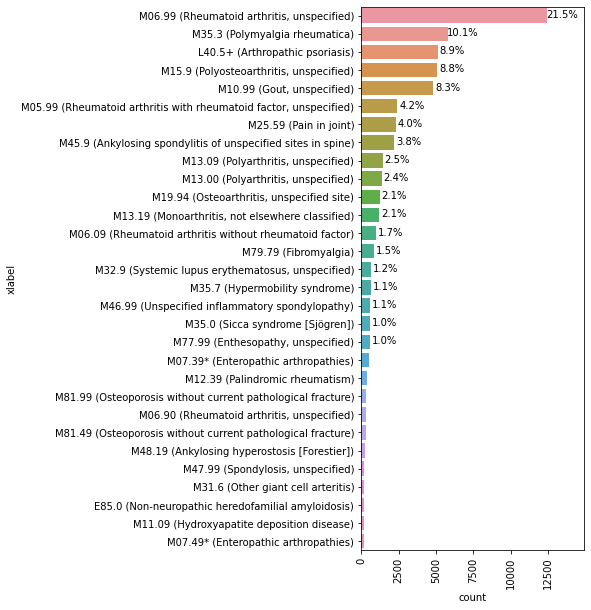

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df_code_desc = pd.read_csv('../suppl/mapped_icd_desc.csv', sep='|')
d_map = dict(zip(df_code_desc['ICD10code'], df_code_desc['desc']))
df_last['Diagnosis'] = df_last['ICD10code'].apply(lambda x : d_map[x] if x in d_map.keys() else np.nan)
df_last['xlabel'] = df_last['ICD10code'] + ' (' + df_last['Diagnosis'] + ')'


# Determine the top 30 categories
top_categories = df_last['xlabel'].value_counts().nlargest(30).index




# Create a subset of the data with only the top 30 categories
subset_data = df_last[df_last['xlabel'].isin(top_categories)]#.sort_values(by)
# Determine the order based on counts
order = subset_data['xlabel'].value_counts().index

# Visualize ICD codes
plt.figure(figsize=(4,10))
#plt.subplots_adjust( right=1.6)

ax = sns.countplot(data= subset_data, y='xlabel', order=order)
#ax = sns.barplot(data=pd.DataFrame(df_last['xlabel'].value_counts()[:30]).reset_index(), x='xlabel', y='index', orient='h')
ax.tick_params(axis='x', rotation=90) # Diagnosis

total = max(df_last['xlabel'].value_counts())
plt.xlim(0,total+total/5)


# Add percentage labels on top of the bars
total = len(df_last["Identifier"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    if (100 * p.get_width() / total) > 1: 

        x = p.get_x() + p.get_width() + total/60
        y = p.get_y() 

        ax.text(x, y+0.5, percentage, ha='center')


#### Get first DMARD date

In [53]:
df_prescriptions = pd.read_csv('../data/20240312_addendum/ZWN_dmard_voorschriften.csv')
df_prescriptions['Startdatum'].max()

'2024-02-23 16:00:00'

In [24]:
import numpy as np

l_rx = ['TOCILIZUMAB', 'METHOTREXAAT', 'HYDROXYCHLOROQUINE',
       'AZATHIOPRINE', 'INFLIXIMAB', 'ABATACEPT',
       'SULFASALAZINE', 'ANAKINRA', 'ETANERCEPT', 'CICLOSPORINE',
       'LEFLUNOMIDE', 'CERTOLIZUMAB PEGOL', 'ADALIMUMAB', 'BARICITINIB',
        'GOLIMUMAB','AUROTHIOBARNSTEENZUUR', 'CYCLOFOSFAMIDE',
       'CHLOROQUINE', 'TOFACITINIB', 'PREDNISOLON', 'METHYLPREDNISOLON', 'PREDNISON']

l_conv_dmard = ['SULFASALAZINE', 'METHOTREXAAT', 'HYDROXYCHLOROQUINE','LEFLUNOMIDE']
l_dmard = ['TOCILIZUMAB', 'METHOTREXAAT', 'HYDROXYCHLOROQUINE',
       'AZATHIOPRINE', 'INFLIXIMAB', 'ABATACEPT',
       'SULFASALAZINE', 'ANAKINRA', 'ETANERCEPT', 'CICLOSPORINE',
       'LEFLUNOMIDE', 'CERTOLIZUMAB PEGOL', 'ADALIMUMAB', 'BARICITINIB',
        'GOLIMUMAB','AUROTHIOBARNSTEENZUUR', 'CYCLOFOSFAMIDE',
       'CHLOROQUINE', 'TOFACITINIB']

l_pred = ['PREDNISOLON', 'METHYLPREDNISOLON', 'PREDNISON']

# Import drug information
df_prescriptions = pd.read_csv('../data/20240312_addendum/ZWN_dmard_voorschriften.csv')
print('%s patients have medication (total: %s)' % (len(df_prescriptions['Identifier'].unique()), len(df_demograph['Identifier'].unique())))

# Extract Medication from text if missing
df_prescriptions['MedicatieNaam'] = df_prescriptions['MedicatieNaam'].str.lower()
d_trans = {'methotrexaat' : 'METHOTREXAAT', 'prednisolon' : 'PREDNISOLON'}

for i in l_rx:
    df_prescriptions['WerkzameStof'] = df_prescriptions['WerkzameStof'].fillna(df_prescriptions['MedicatieNaam'].apply(lambda x: i.upper() if i.lower() in x else np.nan))

# Select patients of interest
#df_prescriptions = df_prescriptions[df_prescriptions['Identifier'].isin(l_pat_RA)].reset_index(drop=True)

# Fix accidental artefact in data
df_prescriptions['WerkzameStof'] = df_prescriptions['WerkzameStof'].str.replace(';', 'GO') 

# Read as pandas data
df_prescriptions['Startdatum'] = pd.to_datetime(df_prescriptions['Startdatum'], format='%Y-%m-%d')

# Get date of first prescription
df_first_rx = df_prescriptions.loc[df_prescriptions.groupby('Identifier')['Startdatum'].idxmin()]
d_first_rx = dict(zip(df_first_rx['Identifier'], df_first_rx['Startdatum']))
d_first_rx_name = dict(zip(df_first_rx['Identifier'], df_first_rx['WerkzameStof']))

# Get date of first conventional dmard 
df_dmard_conv = df_prescriptions[df_prescriptions['WerkzameStof'].isin(l_conv_dmard)].copy()
df_dmard_conv = df_dmard_conv.loc[df_dmard_conv.groupby('Identifier')['Startdatum'].idxmin()]
d_first_csdmard = dict(zip(df_dmard_conv['Identifier'], df_dmard_conv['Startdatum']))
d_first_csdmard_name = dict(zip(df_dmard_conv['Identifier'], df_dmard_conv['WerkzameStof']))

# Get date of first dmard
df_dmard = df_prescriptions[df_prescriptions['WerkzameStof'].isin(l_dmard)].copy() #[df_prescriptions['WerkzameStof'].isin(l_dmard)].copy()
df_first_dmard = df_dmard.loc[df_dmard.groupby('Identifier')['Startdatum'].idxmin()]
d_first_dmard = dict(zip(df_first_dmard['Identifier'], df_first_dmard['Startdatum']))
d_first_dmard_name = dict(zip(df_first_dmard['Identifier'], df_first_dmard['WerkzameStof']))

# Get date of first prednisolon
df_pred = df_prescriptions[df_prescriptions['WerkzameStof'].isin(l_pred)].copy()
df_first_pred = df_pred.loc[df_pred.groupby('Identifier')['Startdatum'].idxmin()]
d_first_pred = dict(zip(df_first_pred['Identifier'], df_first_pred['Startdatum']))

# Add date of first DMARD & first prednisolon to baseline table
df_demograph['FirstDMARD_date'] = df_demograph['Identifier'].apply(lambda x : d_first_dmard[x] if x in d_first_dmard.keys() else np.nan)
df_demograph['FirstDMARD_name'] = df_demograph['Identifier'].apply(lambda x : d_first_dmard_name[x] if x in d_first_dmard_name.keys() else np.nan)
df_demograph['FirstPrednisolon_date'] = df_demograph['Identifier'].apply(lambda x : d_first_pred[x] if x in d_first_pred.keys() else np.nan)


df_demograph['FirstCsDMARD_date'] = df_demograph['Identifier'].apply(lambda x : d_first_csdmard[x] if x in d_first_csdmard.keys() else np.nan)
df_demograph['FirstCsDMARD_name'] = df_demograph['Identifier'].apply(lambda x : d_first_csdmard_name[x] if x in d_first_csdmard_name.keys() else np.nan)

df_demograph['FirstCsDMARD_date'] = df_demograph['FirstCsDMARD_date'].dt.date
df_demograph['FirstDMARD_date'] =df_demograph['FirstDMARD_date'].dt.date
df_demograph['FirstPrednisolon_date'] = df_demograph['FirstPrednisolon_date'].dt.date

# Also infer DMARD for all other patients
df_demograph['FirstDMARD_date'] = df_demograph['Identifier'].apply(lambda x : d_first_dmard[x] if x in d_first_dmard.keys() else np.nan)

# Save all chronic patient (e.g. more than 3 months of follow up & referral letter)
df_referral = pd.read_csv('../dict/df_referral_dates.csv', sep=';')    
l_chronic = list(df_demograph[((df_demograph['FollowUp']>93) & (df_demograph['Identifier'].isin(df_referral['Identifier'])))]['Identifier'].unique())#.to_csv('')
pd.DataFrame(l_chronic, columns=['Identifier']).to_csv('../dict/list_chronic_pat.csv', sep=';', index=None)

# Add date of first prescription to baseline table
#df_baseline['FirstRx_date'] = df_baseline['Identifier'].apply(lambda x : d_first_rx[x] if x in d_first_rx.keys() else np.nan)
#df_baseline['FirstRx_name'] = df_baseline['Identifier'].apply(lambda x : d_first_rx_name[x] if x in d_first_rx_name.keys() else np.nan)


7657 patients have medication (total: 14043)


In [25]:
print('%s patients with referral letters have medication ' % len(df_demograph[((df_demograph['Identifier'].isin(df_prescriptions['Identifier'])) & (df_demograph['Identifier'].isin(list(pd.read_csv('../dict/df_referral_dates.csv', sep=';')['Identifier'].values))))]['Identifier'].unique()))

4431 patients with referral letters have medication 


In [55]:
print('%s patients with referral letters have medication ' % len(df_demograph[((df_demograph['Identifier'].isin(df_prescriptions['Identifier'])) & (df_demograph['Identifier'].isin(list(pd.read_csv('../dict/df_referral_dates.csv', sep=';')['Identifier'].values))))]['Identifier'].unique()))

4909 patients with referral letters have medication 


In [56]:
print('%s patients with referral letters have DMARD ' % len(df_demograph[((~df_demograph['FirstDMARD_date'].isna()) & (df_demograph['Identifier'].isin(list(pd.read_csv('../dict/df_referral_dates.csv', sep=';')['Identifier'].values))))]['Identifier'].unique()))

1463 patients with referral letters have DMARD 


In [57]:
len(df_demograph[((~df_demograph['FirstDMARD_date'].isna()) & (df_demograph['FollowUp']>365))]['Identifier'].unique()), len(df_demograph[((df_demograph['FollowUp']>365))]['Identifier'].unique())

(2367, 5607)

#### Select BMI 

In [58]:
from pandas.tseries.offsets import Day
df_BMI = pd.read_csv('../data/20240312_addendum/ZWN_bmi.csv', sep=',')
#df_BMI = pd.read_csv('../data/ZWN_bmi.csv', sep=',')
# Select first BMI
df_BMI['Invoerdatum'] = pd.to_datetime(df_BMI['Invoerdatum'], format='%Y-%m-%d')
df_BMI = df_BMI.sort_values(by='Invoerdatum')
df_BMI = df_BMI.loc[df_BMI.groupby('Identifier')['Invoerdatum'].idxmin()]

# CHeck if the first BMI is within time window (before first drug is prescribed)
df_BMI['BMI_in_frame'] = df_BMI.apply(lambda x : pd.to_datetime(d_firstConsult[x['Identifier']], format='%Y-%m-%d') <= x['Invoerdatum'] + Day(62) if x['Identifier'] in d_firstConsult.keys() else False, axis=1)
print('patients with BMI around baseline: %s (out of %s with BMI)' % (len(df_BMI[df_BMI['BMI_in_frame']]['Waarde']), len(df_BMI['Identifier'].unique())))

# Add BMI to baseline if it is within predefined window
d_bmi = dict(zip(df_BMI[df_BMI['BMI_in_frame']]['Identifier'], df_BMI[df_BMI['BMI_in_frame']]['Waarde']))
d_bmi_date = dict(zip(df_BMI[df_BMI['BMI_in_frame']]['Identifier'], df_BMI[df_BMI['BMI_in_frame']]['Invoerdatum']))

# Add BMI 
df_demograph['BMI_raw'] = df_demograph['Identifier'].apply(lambda x : d_bmi[x] if x in d_bmi.keys() else '')
df_demograph['BMI_date'] = df_demograph['Identifier'].apply(lambda x : d_bmi_date[x] if x in d_bmi_date.keys() else '')

# remove other characters
df_demograph['BMI_raw'] = df_demograph['BMI_raw'].replace('', np.nan)
# Typecast to float
df_demograph['BMI_raw'] = df_demograph['BMI_raw'].astype(float)

patients with BMI around baseline: 9039 (out of 9523 with BMI)


#### select Smoking

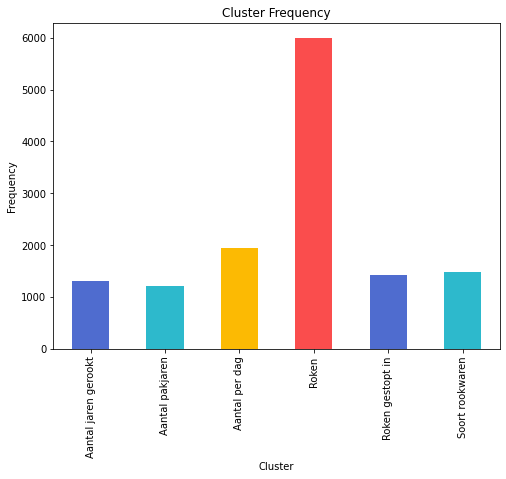

In [59]:
#df_smoking = pd.read_csv('../data/ZWN_roken.csv', sep=',')
df_smoking = pd.read_csv('../data/20240312_addendum/ZWN_roken.csv', sep=',')


import matplotlib.pyplot as plt

# Count the frequency of each category
category_counts = df_smoking['Nette_titel'].value_counts()
category_counts = category_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot( kind='bar', color=['#4F6CCF', '#2db9cc', '#fcba03', '#FA4D4D'])
plt.title('Cluster Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Remove this line if you want rotated x-axis labels
plt.show()

In [60]:
from pandas.tseries.offsets import Day
df_smoking = pd.read_csv('../data/20240312_addendum/ZWN_roken.csv', sep=',')

# Select first Smoking
df_smoking['Invoerdatum'] = pd.to_datetime(df_smoking['Invoerdatum'], format='%Y-%m-%d')
df_smoking = df_smoking.sort_values(by='Invoerdatum')
df_smoking = df_smoking[df_smoking['Nette_titel']=='Roken'].reset_index(drop=True).copy()
#d#f_smoking = df_smoking.loc[df_smoking.groupby('Identifier')['Invoerdatum'].idxmin()]

# CHeck if the first Smoking is within time window (before first drug is prescribed)
df_smoking['Smoking_in_frame'] = df_smoking.apply(lambda x : pd.to_datetime(d_firstConsult[x['Identifier']], format='%Y-%m-%d') <= x['Invoerdatum'] + Day(365) if x['Identifier'] in d_firstConsult.keys() else True, axis=1)
print('patients with Smoking around baseline: %s (out of %s with Smoking info)' % (len(df_smoking[df_smoking['Smoking_in_frame']]['Waarde']), len(df_smoking['Identifier'].unique())))

# Add Smoking to baseline if it is within predefined window
d_smoking = dict(zip(df_smoking['Identifier'], df_smoking['Waarde']))
d_smoking_date = dict(zip(df_smoking['Identifier'], df_smoking['Invoerdatum']))

# add smoking info
df_demograph['Smoking_raw'] = df_demograph['Identifier'].apply(lambda x : d_smoking[x] if x in d_smoking.keys() else '')
df_demograph['Smoking_date'] = df_demograph['Identifier'].apply(lambda x : d_smoking_date[x] if x in d_smoking_date.keys() else '')
df_demograph['Smoking_raw'] = df_demograph['Smoking_raw'].replace('', np.nan)


patients with Smoking around baseline: 5934 (out of 5886 with Smoking info)


#### select Alcohol

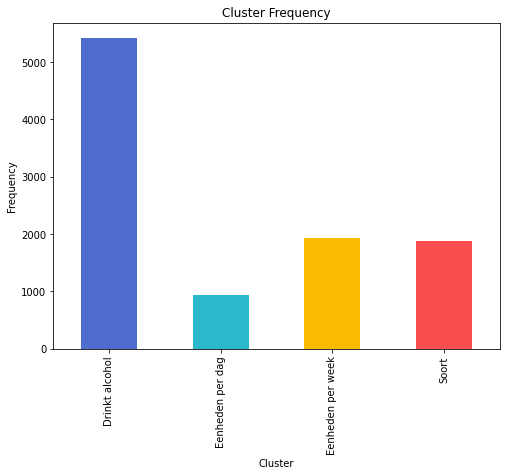

In [61]:
import matplotlib.pyplot as plt

#df_alcohol = pd.read_csv('../data/ZWN_alcohol.csv', sep=',')
df_alcohol = pd.read_csv('../data/20240312_addendum/ZWN_alcohol.csv', sep=',')

# Count the frequency of each category
category_counts = df_alcohol['Nette_titel'].value_counts()
category_counts = category_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot( kind='bar', color=['#4F6CCF', '#2db9cc', '#fcba03', '#FA4D4D'])
plt.title('Cluster Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Remove this line if you want rotated x-axis labels
plt.show()

In [62]:
from pandas.tseries.offsets import Day
df_alcohol = pd.read_csv('../data/20240312_addendum/ZWN_alcohol.csv', sep=',')

# Select first Smoking
df_alcohol['Invoerdatum'] = pd.to_datetime(df_alcohol['Invoerdatum'], format='%Y-%m-%d')
df_alcohol = df_alcohol.sort_values(by='Invoerdatum')
df_alcohol = df_alcohol[df_alcohol['Nette_titel']=='Drinkt alcohol'].reset_index(drop=True).copy()

# CHeck if the first Smoking is within time window (before first drug is prescribed)
df_alcohol['Drinking_in_frame'] = df_alcohol.apply(lambda x : pd.to_datetime(d_firstConsult[x['Identifier']], format='%Y-%m-%d') <= x['Invoerdatum'] + Day(365) if x['Identifier'] in d_firstConsult.keys() else False, axis=1)
print('patients with Alcohol info around baseline: %s (out of %s with Smoking info)' % (len(df_alcohol[df_alcohol['Drinking_in_frame']]['Waarde']), len(df_alcohol['Identifier'].unique())))

# Add Smoking to baseline if it is within predefined window
d_alcohol = dict(zip(df_alcohol['Identifier'], df_alcohol['Waarde']))
d_alcohol_date = dict(zip(df_alcohol['Identifier'], df_alcohol['Invoerdatum']))

# add alcohol info
df_demograph['Alcohol_raw'] = df_demograph['Identifier'].apply(lambda x : d_smoking[x] if x in d_smoking.keys() else '')
df_demograph['Alcohol_date'] = df_demograph['Identifier'].apply(lambda x : d_smoking_date[x] if x in d_smoking_date.keys() else '')
df_demograph['Alcohol_raw'] = df_demograph['Alcohol_raw'].replace('', np.nan)


patients with Alcohol info around baseline: 5322 (out of 5344 with Smoking info)


### 2.3 How many Follow up days 

Mean Followup per patient:  632.550363372093
Median Followup per patient:  164.0


Text(0.5, 1.0, 'Total Follow up')

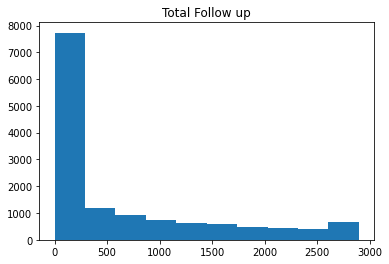

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

print('Mean Followup per patient: ', df_demograph['FollowUp'].mean())
print('Median Followup per patient: ', df_demograph['FollowUp'].median())

plt.hist(df_demograph['FollowUp'])
plt.title('Total Follow up')

#### Look within 1 year: to define threshold for chronic patients

Text(0.5, 1.0, 'Total Follow up (range= 0-365)')

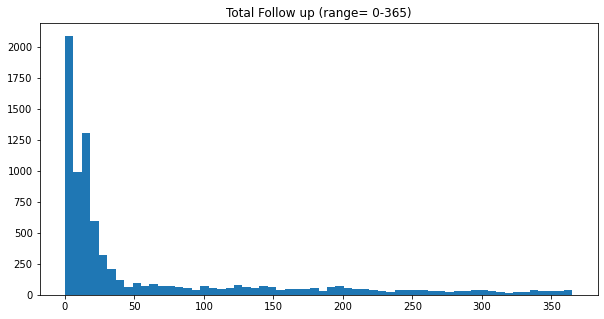

In [65]:
plt.figure(figsize=(10,5))
plt.hist(df_demograph['FollowUp'], range=[0,365], bins=60)
plt.title('Total Follow up (range= 0-365)')

Mean Followup per RA patient:  1438.9370988446726
Median Followup per RA patient:  1401.5


Text(0.5, 1.0, 'Follow up per RA patient')

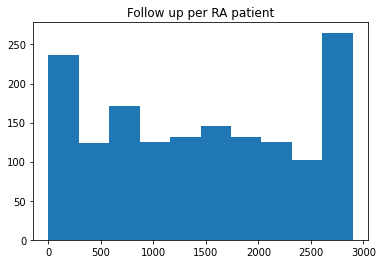

In [66]:
# For RA 
print('Mean Followup per RA patient: ', df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['FollowUp'].mean())
print('Median Followup per RA patient: ', df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['FollowUp'].median())

plt.hist(pd.DataFrame(df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['FollowUp']))
plt.title('Follow up per RA patient')

### 2.4 How many visits do we have for all patients? 

Mean visits per patient:  7.3656976744186045
Median visits per patient:  3.0


Text(0.5, 1.0, 'Number of visits per patient')

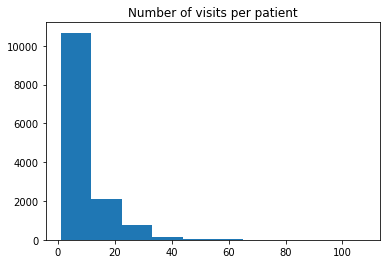

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

print('Mean visits per patient: ', df_demograph['Visits'].mean())
print('Median visits per patient: ', df_demograph['Visits'].median())

plt.hist(df_demograph['Visits'])
plt.title('Number of visits per patient')

#### 2.4.1. visits per RA patient

Mean visits per RA patient:  17.157252888318357
Median visits per RA patient:  16.0


Text(0.5, 1.0, 'Number of visits per RA patient')

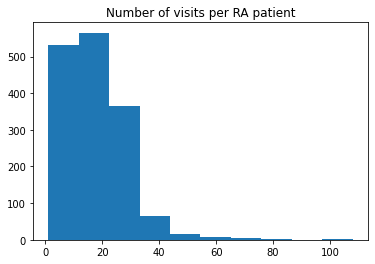

In [68]:
# For RA 
print('Mean visits per RA patient: ', df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['Visits'].mean())
print('Median visits per RA patient: ', df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['Visits'].median())

plt.hist(df_demograph[df_demograph['Identifier'].isin(l_pat_RA)]['Visits'])
plt.title('Number of visits per RA patient')

### 2.5 Add mannequin data

In [ ]:
import pandas as pd
from pandas.tseries.offsets import Day

df_mannequin = pd.read_csv('../data/20240312_addendum/ZWN_zwellingpijn.csv', sep=',')
#df_mannequin =pd.read_csv('../data/ZWN_gewrichtspop.csv', sep=',')

# Select patients of interest
#df_mannequin = df_mannequin[df_mannequin['Identifier'].isin(l_pat_RA)].reset_index(drop=True)
print('patients with mannequin info: %s (out of %s)' % (len(df_mannequin['Identifier'].unique()), len(l_pat_RA)))

# Format Date
df_mannequin['Invoerdatum'] = pd.to_datetime(df_mannequin['Invoerdatum'], format='%Y-%m-%d')

# Add date of first DMARD
df_mannequin['FirstDMARD'] = df_mannequin['Identifier'].apply(lambda x : d_first_dmard[x] if x in d_first_dmard.keys() else np.nan)

# CHeck for mannequin at baseline... a.k.a. within time window (before first drug is prescribed)
df_mannequin['Mannequin_in_frame'] = df_mannequin.apply(lambda x : (x['Invoerdatum'] <= x['FirstDMARD']  + Day(14) or pd.isna(x['FirstDMARD'])), axis=1)
print('patients with Mannequin around baseline: %s (out of %s with Mannequin)' % (len(df_mannequin[df_mannequin['Mannequin_in_frame']]['Identifier'].unique()), len(df_mannequin['Identifier'].unique())))

#d_score = {'Pijn': 'T', 'Zwelling' : 'S', 'Pijn & Zwelling' : 'ST'}
df_mannequin['XANTWOORD'] = df_mannequin.Gewricht + '_' + df_mannequin.Kant
# Save follow up mannequin to calculate DAS at a later stage 
df_mannequin.to_csv('../proc/ZWN_followUp_Mannequin.csv', sep=',')

# Fix for later code
df_mannequin['XANTWOORD'] = df_mannequin.Gewricht + '_' + df_mannequin.Kant


df_mannequin.head()

#### 2.4.2 Convert from long to wide

In [70]:
l_mannequin = ['Identifier', 'S_TMJ_Rechts', 'S_ankle_Links', 'S_ankle_Rechts', 'S_dip2_Links', 'S_dip2_Rechts', 'S_dip3_Links', 'S_dip3_Rechts', 'S_dip4_Links', 'S_dip4_Rechts', 'S_dip5_Links', 'S_dip5_Rechts', 'S_elbow_Links', 'S_elbow_Rechts', 'S_footip1_Rechts', 'S_footpip2_Links', 'S_footpip2_Rechts', 'S_footpip3_Links', 'S_footpip3_Rechts', 'S_footpip4_Links', 'S_footpip4_Rechts', 'S_footpip5_Links', 'S_footpip5_Rechts', 'S_glenohumeral_Links', 'S_glenohumeral_Rechts', 'S_ip1_Links', 'S_ip1_Rechts', 'S_knee_Links', 'S_knee_Rechts', 'S_mcp1_Links', 'S_mcp1_Rechts', 'S_mcp2_Links', 'S_mcp2_Rechts', 'S_mcp3_Links', 'S_mcp3_Rechts', 'S_mcp4_Links', 'S_mcp4_Rechts', 'S_mcp5_Links', 'S_mcp5_Rechts', 'S_mtp1_Links', 'S_mtp1_Rechts', 'S_mtp2_Links', 'S_mtp2_Rechts', 'S_mtp3_Links', 'S_mtp3_Rechts', 'S_mtp4_Links', 'S_mtp4_Rechts', 'S_mtp5_Links', 'S_mtp5_Rechts', 'S_pip2_Links', 'S_pip2_Rechts', 'S_pip3_Links', 'S_pip3_Rechts', 'S_pip4_Links', 'S_pip4_Rechts', 'S_pip5_Links', 'S_pip5_Rechts', 'S_sternoclavicular_Links', 'S_sternoclavicular_Rechts', 'S_wrist_Links', 'S_wrist_Rechts', 'T_TMJ_Links', 'T_TMJ_Rechts', 'T_acromioclavicular_Links', 'T_acromioclavicular_Rechts', 'T_ankle_Links', 'T_ankle_Rechts', 'T_dip2_Links', 'T_dip2_Rechts', 'T_dip3_Links', 'T_dip3_Rechts', 'T_dip4_Links', 'T_dip4_Rechts', 'T_dip5_Links', 'T_dip5_Rechts', 'T_elbow_Links', 'T_elbow_Rechts', 'T_footpip2_Links', 'T_footpip2_Rechts', 'T_footpip3_Links', 'T_footpip3_Rechts', 'T_footpip4_Links', 'T_footpip4_Rechts', 'T_footpip5_Links', 'T_footpip5_Rechts', 'T_glenohumeral_Links', 'T_glenohumeral_Rechts', 'T_hip_Links', 'T_hip_Rechts', 'T_ip1_Links', 'T_ip1_Rechts', 'T_knee_Links', 'T_knee_Rechts', 'T_mcp1_Links', 'T_mcp1_Rechts', 'T_mcp2_Links', 'T_mcp2_Rechts', 'T_mcp3_Links', 'T_mcp3_Rechts', 'T_mcp4_Links', 'T_mcp4_Rechts', 'T_mcp5_Links', 'T_mcp5_Rechts', 'T_mtp1_Links', 'T_mtp1_Rechts', 'T_mtp2_Links', 'T_mtp2_Rechts', 'T_mtp3_Links', 'T_mtp3_Rechts', 'T_mtp4_Links', 'T_mtp4_Rechts', 'T_mtp5_Links', 'T_mtp5_Rechts', 'T_pip2_Links', 'T_pip2_Rechts', 'T_pip3_Links', 'T_pip3_Rechts', 'T_pip4_Links', 'T_pip4_Rechts', 'T_pip5_Links', 'T_pip5_Rechts', 'T_sternoclavicular_Links', 'T_sternoclavicular_Rechts', 'T_talonavicular_Links', 'T_wrist_Links', 'T_wrist_Rechts', 'ST_TMJ_Rechts', 'ST_ankle_Links', 'ST_ankle_Rechts', 'ST_dip2_Rechts', 'ST_elbow_Links', 'ST_elbow_Rechts', 'ST_footip1_Links', 'ST_footip1_Rechts', 'ST_footpip2_Links', 'ST_footpip2_Rechts', 'ST_footpip3_Links', 'ST_footpip3_Rechts', 'ST_footpip4_Links', 'ST_footpip4_Rechts', 'ST_footpip5_Links', 'ST_footpip5_Rechts', 'ST_glenohumeral_Links', 'ST_glenohumeral_Rechts', 'ST_ip1_Links', 'ST_ip1_Rechts', 'ST_knee_Links', 'ST_knee_Rechts', 'ST_mcp1_Links', 'ST_mcp1_Rechts', 'ST_mcp2_Links', 'ST_mcp2_Rechts', 'ST_mcp3_Links', 'ST_mcp3_Rechts', 'ST_mcp4_Links', 'ST_mcp4_Rechts', 'ST_mcp5_Links', 'ST_mcp5_Rechts', 'ST_mtp1_Links', 'ST_mtp1_Rechts', 'ST_mtp2_Links', 'ST_mtp2_Rechts', 'ST_mtp3_Links', 'ST_mtp3_Rechts', 'ST_mtp4_Links', 'ST_mtp4_Rechts', 'ST_mtp5_Links', 'ST_mtp5_Rechts', 'ST_pip2_Links', 'ST_pip2_Rechts', 'ST_pip3_Links', 'ST_pip3_Rechts', 'ST_pip4_Links', 'ST_pip4_Rechts', 'ST_pip5_Links', 'ST_pip5_Rechts', 'ST_sternoclavicular_Rechts', 'ST_talonavicular_Links', 'ST_talonavicular_Rechts', 'ST_wrist_Links', 'ST_wrist_Rechts']


df_man = pd.DataFrame(columns=l_mannequin)

# Concatanate joint + side
for ix in df_mannequin['Identifier'].unique():

    sub_df = df_mannequin[df_mannequin['Identifier']==ix].copy()
    
    # Get swollen, Tender and both
    rows = pd.get_dummies(sub_df[sub_df['Score']=='Zwelling'].XANTWOORD, prefix='S').reset_index(drop=True).replace(0, np.nan)
    rows = pd.concat([rows, pd.get_dummies(sub_df[sub_df['Score']=='Pijn'].XANTWOORD, prefix='T').reset_index(drop=True)]).replace(0, np.nan)
    rows = pd.concat([rows, pd.get_dummies(sub_df[sub_df['Score']=='Pijn & Zwelling'].XANTWOORD, prefix='ST').reset_index(drop=True)]).replace(0, np.nan)
    
    # replace missing with nan
    if len(rows) > 0 : 
        # Combine rows into one Pandas Series
        merged_series = rows.ffill(axis=1).iloc[:, -1]
        # remove duplicates:
        if len(merged_series) > len(rows.columns): 
            offset = len(merged_series)- len(rows.columns)
            merged_series = merged_series[:-offset]
        merged_series.index = rows.columns # doesnt really matter whether or not they are ordered
        row = pd.DataFrame(merged_series).T
        row = row.reset_index(drop=True)
        row['Identifier']= ix
        df_man = pd.concat([df_man, row]).fillna(0)
    else : 
        df_man =  pd.concat([df_man, pd.DataFrame({'Identifier' : [ix]})]).fillna(0)

#df_man

In [71]:
# fill NaN with 0.0
#new_df = new_df.fillna(0.0) # if joint is not reported we presume it is negative (0)
df_man['SJC'] = df_man[[col for col in df_man.columns if ('S_' in col or 'ST_' in col)]].sum(axis=1)
df_man['TJC'] = df_man[[col for col in df_man.columns if ('T_' in col or 'ST_' in col)]].sum(axis=1) 


# Add SJC to baseline table
d_sjc = dict(zip(df_man['Identifier'], df_man['SJC']))
d_tjc = dict(zip(df_man['Identifier'], df_man['TJC']))


# Add SJC and TJC to baseline table
df_demograph['SJC'] = df_demograph['Identifier'].apply(lambda x : d_sjc[x] if x in d_sjc.keys() else np.nan)
df_demograph['TJC'] = df_demograph['Identifier'].apply(lambda x : d_tjc[x] if x in d_tjc.keys() else np.nan)


### 2.5 Add lab data

In [72]:
df_lab =pd.read_csv('../data/ZWN_labuitslagen.csv', sep=';') # To Do update with Lab once we have information for these patients

# Add date of first DMARD
df_lab['FirstDMARD'] = df_lab['Identifier'].apply(lambda x : d_first_dmard[x] if x in d_first_dmard.keys() else np.nan)


# Select patients of interest
#df_lab = df_lab[df_lab['Identifier'].isin(l_pat_RA)].reset_index(drop=True)
print('patients with lab info: %s (out of %s)' % (len(df_lab['Identifier'].unique()), len(l_pat_RA)))

patients with lab info: 11053 (out of 1543)


#### 2.5.1 Add ESR

In [74]:
d_esr_artefacts = { 
    'Het materiaal is nooit op het laboratorium aangekomen, of is op het laboratorium verloren gegaan. .brOnze welgemeende excuses voor het ongemak. Voor vragen kunt u contact opnemen met Diagnostiek voor U.' : np.nan,
    'zie opm' : np.nan,
    'n.t.b.' : np.nan,
    'te weinig materiaal' : np.nan,
     'Monster niet ontvangen patient wordt opnieuw opgeroepen' : np.nan,
    'zie commentaar': np.nan,
    'gestold' : np.nan,
    'zie commentaar.brdoor fout op lab, materiaal verloren gegaan. onze excuses.' : np.nan,
    'zie commentaar.brApparaat is defect gegaan. Helaas valt de bezinking niet te meten.' : np.nan,
   'zie commentaar.br\x08se niet mogelijk. Bellen on top!' : np.nan,
   'zie commentaar.brerror op apparaat, onvoldoende materiaal om over te doen' : np.nan,
   'zie commentaar.brTest mislukt. Niet meer te bepalen.' : np.nan, 
   '10.br\x08se op Alifax bepaald ivm storing Inversa' : np.nan, 'Zie opm' : np.nan,
   '28.brBepaling op Alifax gedaan omdat Inversa buiten werking is' : np.nan,
    'n.t.b..brMateriaal te oud voor bepaling.': np.nan,
    'weigert' :np.nan,
    'om' : np.nan,  
    '<1' : 1,
    '>95' : 95
}

l_crp = ['CRP (C-reactief proteine)', 'CRP', 'CRP(CRP B)']
l_esr = [ 'bezinking erytrocyten (BSE)', 'BSE', 'Bezinking(BSE B 1U)', 'Bezinking', 'Bezinking (BSE)']

# Select first esr -> that is not one of the artefacts!!
df_first_esr = df_lab[df_lab['ObservatieTekst'].isin(l_esr)].reset_index(drop = True).copy()
df_first_esr['ObservatieDatumTijd'] = pd.to_datetime(df_first_esr['ObservatieDatumTijd'], format='%Y-%m-%d', errors = 'coerce')
df_first_esr['FirstDMARD'] = pd.to_datetime(df_first_esr['FirstDMARD'], format='%Y-%m-%d')

#df_first_esr = df_first_esr
df_first_esr = df_first_esr.loc[df_first_esr.groupby('Identifier')['ObservatieDatumTijd'].idxmin()]

# CHeck if the first esr is within time window (before first drug is prescribed)
df_first_esr['ESR_in_frame'] = df_first_esr.apply(lambda x :  (x['ObservatieDatumTijd'] <= x['FirstDMARD']  + Day(1) or pd.isna(x['FirstDMARD'])), axis=1)
print('patients with ESR around baseline: %s (out of %s with ESR)' % (len(df_first_esr[df_first_esr['ESR_in_frame']]['ObservatieWaarde']), len(df_first_esr['Identifier'].unique())))

# remove artefacts
df_first_esr['ObservatieWaarde'] = df_first_esr['ObservatieWaarde'].apply(lambda x: d_esr_artefacts[x] if x in d_esr_artefacts.keys() else x)

# Add ESR to baseline if it is within predefined window
d_esr = dict(zip(df_first_esr[df_first_esr['ESR_in_frame']]['Identifier'], df_first_esr[df_first_esr['ESR_in_frame']]['ObservatieWaarde']))

# Add ESR to overall table
df_demograph['ESR_raw'] = df_demograph['Identifier'].apply(lambda x : d_esr[x] if x in d_esr.keys() else np.nan)
df_demograph['ESR_raw'] = df_demograph['ESR_raw'].astype(float)


patients with ESR around baseline: 10363 (out of 10543 with ESR)


In [75]:
df_first_esr['FirstDMARD'] = pd.to_datetime(df_first_esr['FirstDMARD'], format='%Y-%m-%d')

#### 2.5.2 Select CRP

In [76]:
d_crp_artefacts = { 
    '<2.brResultaat maximaal 20% verlaagd door lipemie.' :np.nan,
    '6.brResultaat maximaal 20% verlaagd door lipemie.': np.nan,  
    'Monster niet ontvangen patient wordt opnieuw opgeroepen': np.nan,  
    'Geen resultaat mogelijk door lipemie.': np.nan,
     '97.brResultaat maximaal 20% verlaagd door lipemie.' : np.nan
    
}

# Select first crp
df_first_crp = df_lab[df_lab['ObservatieTekst'].isin(l_crp)].reset_index(drop = True).copy()
df_first_crp['ObservatieDatumTijd'] = pd.to_datetime(df_first_crp['ObservatieDatumTijd'], format='%Y-%m-%d', errors = 'coerce')
df_first_crp = df_first_crp.loc[df_first_crp.groupby('Identifier')['ObservatieDatumTijd'].idxmin()]

# CHeck if the first crp  is within time window (before first drug is prescribed)
df_first_crp['CRP_in_frame'] = df_first_crp.apply(lambda x :  (x['ObservatieDatumTijd'] <= x['FirstDMARD']  + Day(1) or pd.isna(x['FirstDMARD'])), axis=1)
print('patients with CRP around baseline: %s (out of %s with ESR)' % (len(df_first_crp[df_first_crp['CRP_in_frame']]['ObservatieWaarde']), len(df_first_crp['Identifier'].unique())))

# remove CRP artefacts
df_first_crp['ObservatieWaarde'] = df_first_crp['ObservatieWaarde'].apply(lambda x: d_crp_artefacts[x] if x in d_crp_artefacts.keys() else x)

# Add CRP to baseline if it is within predefined window
d_crp = dict(zip(df_first_crp[df_first_crp['CRP_in_frame']]['Identifier'], df_first_crp[df_first_crp['CRP_in_frame']]['ObservatieWaarde']))

# Add CRP to total table
df_demograph['CRP_raw'] = df_demograph['Identifier'].apply(lambda x : d_crp[x] if x in d_crp.keys() else '')
df_demograph['CRP_raw'] = df_demograph['CRP_raw'].fillna('')
df_demograph['CRP_raw'] = df_demograph['CRP_raw'].apply(lambda x: x.replace('<', '').replace('>', ''))
df_demograph['CRP_raw'] = df_demograph['CRP_raw'].replace('', np.nan)
df_demograph['CRP_raw'] = df_demograph['CRP_raw'].astype(float)

patients with CRP around baseline: 10561 (out of 10722 with ESR)


### 2.6.1 Extract hematological makeup 

In [77]:
df_lab['ObservatieDatumTijd'] = pd.to_datetime(df_lab['ObservatieDatumTijd'], format='%Y-%m-%d', errors = 'coerce')
df_lab['in_frame'] = df_lab.apply(lambda x : (x['ObservatieDatumTijd'] <= x['FirstDMARD']  + Day(1) or pd.isna(x['FirstDMARD'])), axis=1)

In [78]:
def remove_trailing_text(text):
    if text == text: 
        if '.brSinds 20-07-2017 worden MCV en RDW automatisch toegevoegd bij elke HB aanvraag.' in text :
            return text.replace('.brSinds 20-07-2017 worden MCV en RDW automatisch toegevoegd bij elke HB aanvraag.', '')
        elif '.brOverweeg bij een onbekende trombocytopenie om de trombocytenbepaling opnieuw .braan te vragen in citraatbloed om een eventuele pseudotrombocytopenie uit te sluiten.' in text :
            return text.replace('.brOverweeg bij een onbekende trombocytopenie om de trombocytenbepaling opnieuw .braan te vragen in citraatbloed om een eventuele pseudotrombocytopenie uit te sluiten.', '')
        elif '> ' in text or '>' in text:
            return text.replace('> ', '').replace('>', '')
        elif '-' in text or '+' in text: 
            return np.nan
        else :
            return text
    else :
        return text
    
d_hemo_artefacts = { 
    'te weinig materiaal' : np.nan,
    'Monster niet ontvangen patient wordt opnieuw opgeroepen' : np.nan,
    'zie commentaar': np.nan,
    'gestold' : np.nan,
    'Niet verricht' : np.nan,
    'Het materiaal is niet, of zonder correcte identificatie ontvangen..brPatient wordt door ons opnieuw opgeroepen.' : np.nan,
    'Geen geschikt materiaal ontvangen, patient wordt benaderd voor nieuwe afname.' : np.nan,
    'zie commentaar.brmateriaal te laat ontvangen, kan niet meer bepaald worden.' : np.nan,
    'Het materiaal is niet, of zonder correcte identificatie ontvangen.'  : np.nan,
    'Materiaal niet ontvangen bij aanvraag.'  : np.nan,
    '12.9.br16-8 Telefonisch contact gehad over deze uitslag. Hoog Hb kan passen bij PCV. Karin Nabbe, klinisch chemicus.' : 12.9,
    'zie commentaar.brMevrouw is moeilijk te prikken, afname niet volledig gelukt. Patient komt begin van de week terug.' : np.nan,
    'Materiaal is zonder identificatie ontvangen, patient wordt benaderd voor nieuwe afname.' : np.nan,
    'zie commentaar.brBuis was niet te prikken..brIom arts vervallen testen.' : np.nan,
    'zie opm' : np.nan,
    'neg' : np.nan,
    'Niet te bepalen ivm oud bloed' : np.nan,
    'Negatief' : np.nan,
    'Positief': np.nan,
    'negatief' : np.nan,
    'spoor' : np.nan,
    'Ten minste 285' : 285,
    'Ten minste 346' : 346,
    'Urine niet ontvangen, mogelijk niet ingeleverd door patiënt?' : np.nan,
    'Het materiaal is nooit op het laboratorium aangekomen, of is op het laboratorium verloren gegaan. .brOnze welgemeende excuses voor het ongemak. Voor vragen kunt u contact opnemen met Diagnostiek voor U.' : np.nan,
    'Materiaal te oud' : np.nan,
    'Materiaal te oud.brHet bloed is te oud om betrouwbaar het MCV en de RDW te kunnen bepalen.' : np.nan,
    'Materiaal niet ontvangen bij aanvraag, client verzocht alsnog materiaal in te leveren.' : np.nan,
    '0.1.brLET OP! dit betreft synoviaalvocht.' : np.nan
}

l_lab= ['Identifier', 'Hematocriet', 'hemoglobine', 'Hemoglobine','Lymfocyten', 'Monocyten',  'monocyten', "mono's", 'Leucocyten', 'Leukocyten', 'leukocyten', 'Leucocyten (WBC)','Trombocyten', 'trombocyten', 'MCV', 'MCV(MCV B)','MCH', 'MCHC', "lymfo's", ]


df_hemo = df_lab[((df_lab['in_frame']==1) & (df_lab['ObservatieTekst'].isin(l_lab)))].copy()#[l_lab]
df_hemo = df_hemo.reset_index(drop=True)
# sort in descending order, so we save last one (earliest)
df_hemo = df_hemo.sort_values(by='ObservatieDatumTijd', ascending=False)


# Remove trailing text
df_hemo['ObservatieWaarde'] = df_hemo['ObservatieWaarde'].apply(lambda x: remove_trailing_text(x))
# remove  artefacts
df_hemo['ObservatieWaarde'] = df_hemo['ObservatieWaarde'].apply(lambda x: d_hemo_artefacts[x] if x in d_hemo_artefacts.keys() else x)


# Add Hb to baseline if it is within predefined window
l_hb = ['Hemoglobine', 'hemoglobine']
d_hb = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_hb)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_hb)]['ObservatieWaarde']))

# Add Ht to baseline
l_ht = ['Hematocriet']
d_ht = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_ht)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_ht)]['ObservatieWaarde']))

# Add Leukocytes to baseline
l_leuko = ['Leucocyten', 'Leukocyten', 'leukocyten', 'Leucocyten (WBC)']
d_leuko = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_leuko)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_leuko)]['ObservatieWaarde']))

# Add Trombocytes to baseline
l_trom = ['Trombocyten', 'trombocyten']
d_trom = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_trom)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_trom)]['ObservatieWaarde']))

# Add MCV to baseline
l_mcv = ['MCV', 'MCV(MCV B)']
d_mcv = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_mcv)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_mcv)]['ObservatieWaarde']))

# Add MCH to baseline
l_mch = ['MCH']
d_mch = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_mch)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_mch)]['ObservatieWaarde']))

# Add MCHC to baseline
l_mchc = ['MCHC']
d_mchc = dict(zip(df_hemo[df_hemo['ObservatieTekst'].isin(l_mchc)]['Identifier'], df_hemo[df_hemo['ObservatieTekst'].isin(l_mchc)]['ObservatieWaarde']))


#### 2.7.1 Extract RF & ACPA status 

With respect to the autoantibody status, we do not have to impose additional time constraints, given that the autoantibody status generally remains the same across time (especially in the 6 month period (starting at first consult) that was used for this selection of lab values)

In [79]:
# get rheumatoid factor
l_rf = ['Reumafactor IgM', 'Reumafactor', 'reumafactoren','IgM RF']
l_accp = ['anti CCP', 'Anti-CCP', 'CCP as', 'Anti CCP','Anti CCP (citrulline)']

# Collect RF 
df_rf = df_lab[df_lab['ObservatieTekst'].isin(l_rf)].copy()
d_rf = dict(zip(df_rf['Identifier'], df_rf['ObservatieWaarde']))

# Collect aCCP
df_aCCP = df_lab[df_lab['ObservatieTekst'].isin(l_accp)].copy()
d_aCCP = dict(zip(df_rf['Identifier'], df_rf['ObservatieWaarde']))

print('patients with RF info: %s (out of %s)' % (len(df_lab[df_lab['ObservatieTekst'].isin(l_rf)]['Identifier'].unique()), len(l_pat_RA)))
print('patients with aCCP info: %s (out of %s)' % (len(df_lab[df_lab['ObservatieTekst'].isin(l_accp)]['Identifier'].unique()), len(l_pat_RA)))


# Add ACPA to baseline table
df_demograph['ACPA_raw'] = df_demograph['Identifier'].apply(lambda x : d_aCCP[x] if x in d_aCCP.keys() else np.nan)

# Add RF to baseline table
df_demograph['RF_raw'] = df_demograph['Identifier'].apply(lambda x : d_rf[x] if x in d_rf.keys() else np.nan)

# Binarize RF & ACPA information
df_demograph['RF'] = df_demograph['RF_raw'].apply(lambda x : func.infer_RF(x))#.iloc[3]
df_demograph['ACPA'] = df_demograph['ACPA_raw'].apply(lambda x : func.infer_aCCP(x))#.iloc[3]

# Add hematological information
df_demograph['MCV'] = df_demograph['Identifier'].apply(lambda x : d_mcv[x] if x in d_mcv.keys() else np.nan)
df_demograph['MCH'] = df_demograph['Identifier'].apply(lambda x : d_mch[x] if x in d_mch.keys() else np.nan)
df_demograph['MCHC'] = df_demograph['Identifier'].apply(lambda x : d_mchc[x] if x in d_mchc.keys() else np.nan)
df_demograph['Hb'] = df_demograph['Identifier'].apply(lambda x : d_hb[x] if x in d_hb.keys() else np.nan)
df_demograph['Ht'] = df_demograph['Identifier'].apply(lambda x : d_ht[x] if x in d_ht.keys() else np.nan)
df_demograph['Leuko'] = df_demograph['Identifier'].apply(lambda x : d_leuko[x] if x in d_leuko.keys() else np.nan)
df_demograph['Trom'] = df_demograph['Identifier'].apply(lambda x : d_trom[x] if x in d_trom.keys() else np.nan)

df_demograph = df_demograph.rename(columns = {'Geslacht':  'Sex', 'Leeftijd_Eerste_Afspraak' : 'Age'})
df_demograph['Sex'] = df_demograph['Sex'].replace({'V' : 1, 'F' : 1, 'M' : 0, 'O' : np.nan})
df_demograph['ACPA'] = df_demograph['ACPA'].replace({'Positief' : 1, 'Negatief' : 0})
df_demograph['RF'] = df_demograph['RF'].replace({'Positief' : 1, 'Negatief' : 0})
df_demograph.to_csv('../dict/Demographics_ALL.csv', sep=';', index=None)


patients with RF info: 5844 (out of 1543)
patients with aCCP info: 5829 (out of 1543)


### 3. Prepare data to render baseline table

In [80]:
df_baseline = df_demograph[df_demograph['Identifier'].isin(l_pat_RA)].reset_index(drop=True)
df_baseline.to_csv('../dict/Demographics_RA.csv', sep=';', index=None)



### 3.1 Generate overview for all data (even those with incomplete info)

In [ ]:
import pandas as pd
import numpy as np

# Add referral date
l_chronic = list(pd.read_csv('../dict/list_chronic_pat.csv', sep=';')['Identifier'])
l_pat_RA_ref = list(pd.read_csv('../dict/list_ra_patients_referral.csv', sep=';')['0'])
df_refdates = pd.read_csv('../dict/df_referral_dates.csv', sep=';')
d_refdelta = dict(zip(df_refdates['Identifier'], df_refdates['delta_referral_visit'])
 
# Baseline
df_baseline = pd.read_csv('../dict/Demographics_ALL.csv', sep=';')

# Add referral date
df_baseline['deltaref'] = df_baseline['Identifier'].apply(lambda x : d_refdelta[x] if x in d_refdelta.keys() else np.nan)

In [ ]:
import numpy as np

def IQR(data):
    # First quartile (Q1)
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
   
    # Interquaritle range (IQR)
    iqr = Q3 - Q1
    return [Q1, Q3]

df_summary = pd.DataFrame(columns=['cluster', 'N', 'DMARD [n(%)]', 'Sex, F [n(%)]','Age (mean+-SD, yr)', 'BMI (mean+-SD)', 'Wait time, days (median+-IQR)', 'RF [n(%)]', 'ACPA [n(%)]', 'ESR (median+-IQR)', 'CRP (median+-IQR)', 'SJC (median+-IQR)','TJC (median+-IQR)',  'Visits (median+-IQR)', 'Follow Up (median+-IQR)', 'RF_na [n(%)]','ACPA_na [n(%)]', 'ESR_na [n(%)]' , 'CRP_na [n(%)]', 'SJC_na [n(%)]' , 'TJC_na [n(%)]', 'BMI_na [n(%)]']) #TreatSwitch [n(%)]', 

def generate_baseline_ref(df_baseline, name = 'All'):
    return [name, '%.2f' % len(df_baseline), 
     '%.0f (%.1f)' % (len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]), (max(0.00001, len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]))/len(df_baseline))*100),
     '%.0f (%.1f)' % (np.sum(df_baseline['Sex']), np.mean(df_baseline['Sex']) * 100),  '%.1f (%.1f)' % (np.mean(df_baseline['Age']), np.std(df_baseline['Age'])), 
     '%.1f (%.1f)' % (np.mean(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw']), np.std(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw'])),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline['deltaref']), IQR(df_baseline['deltaref'])[0], IQR(df_baseline['deltaref'])[1]), 
     '%.0f (%.1f)' % (np.sum(df_baseline['RF']), np.mean(df_baseline['RF']) * 100), 
     '%.0f (%.1f)' % (np.sum(df_baseline['ACPA']), np.mean(df_baseline['ACPA']) * 100),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw']), IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[0], IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw']), IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[0], IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['SJC'].isna()]['SJC']), IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[0], IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[1]) if len(df_baseline[~df_baseline['SJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['TJC'].isna()]['TJC']), IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[0], IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[1]) if len(df_baseline[~df_baseline['TJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline['Visits']), IQR(df_baseline['Visits'])[0], IQR(df_baseline['Visits'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline['FollowUp']), IQR(df_baseline['FollowUp'])[0], IQR(df_baseline['FollowUp'])[1]),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['RF'].isna()]), (len(df_baseline[df_baseline['RF'].isna()])/len(df_baseline))*100), '%.0f (%.1f)' % (len(df_baseline[df_baseline['ACPA'].isna()]), (len(df_baseline[df_baseline['ACPA'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['ESR_raw'].isna()]), (len(df_baseline[df_baseline['ESR_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['CRP_raw'].isna()]), (len(df_baseline[df_baseline['CRP_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['SJC'].isna()]), (len(df_baseline[df_baseline['SJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['TJC'].isna()]), (len(df_baseline[df_baseline['TJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['BMI_raw'].isna()]), (len(df_baseline[df_baseline['BMI_raw'].isna()])/len(df_baseline))*100),
    ]
# 

# select non RA 
nonRA = df_baseline[((~df_baseline['Identifier'].isin(l_pat_RA_ref)) & (~df_baseline['deltaref'].isna()))]
RA = df_baseline[((~df_baseline['FirstDMARD_date'].isna()) & (df_baseline['Identifier'].isin(l_pat_RA_ref)) & (~df_baseline['deltaref'].isna()))]



df_summary.loc[0] = generate_baseline_ref(nonRA, 'nonRA')
df_summary.loc[1] = generate_baseline_ref(RA, 'RA')

df_summary = df_summary.reset_index(drop=True)
df_summary.T

### Render baseline of RA patients that have referral letters

In [ ]:
import pandas as pd
l_pat_RA_ref = list(pd.read_csv('../dict/list_ra_patients_referral.csv', sep=';')['0'])
print(len(l_pat_RA_ref))

In [82]:
print('Number of patients that start with DMARD: ', len(df_baseline[(df_baseline['FirstDMARD_date']==df_baseline['FirstDMARD_date'])]))

Number of patients that start with DMARD:  2636


In [83]:


# Patients should have RA-ICD code, 3 mo of Follow up, a referral letter and a DMARD prescribed
print('Number of patients with more than 3 mo of followup : ', len(df_baseline[df_baseline['FollowUp']>93]['Identifier'].unique()))


# select non RA 
nonChronic = df_baseline[((~df_baseline['Identifier'].isin(l_chronic)) & (~df_baseline['deltaref'].isna()))]

df_summary.loc[0] = generate_baseline_ref(nonChronic, 'nonChronic')

df_summary.loc[1] = generate_baseline_ref(df_baseline, 'total population')

#df_summary = df_summary.reset_index(drop=True)
df_summary.T

Number of patients with more than 3 mo of followup :  7439


,0,1
cluster,nonChronic,RA population
N,4184.00,14195.00
DMARD [n(%)],42 (1.0),2636 (18.6)
"Sex, F [n(%)]",3105 (74.2),9568 (67.4)
"Age (mean+-SD, yr)",51.3 (16.1),54.5 (16.5)
BMI (mean+-SD),27.4 (5.4),27.5 (5.4)
"Wait time, days (median+-IQR)",8.0 (4.0-16.0),nan (nan-nan)
RF [n(%)],522 (30.8),2238 (38.1)
ACPA [n(%)],218 (12.9),1210 (20.6)
ESR (median+-IQR),8.0 (5.0-14.0),10.0 (5.0-20.0)


In [85]:
import pandas as pd
import numpy as np

thresh_loc = 1000

df_center_location = pd.read_csv('../data/20240129_Afspraak_locatie.csv', sep=';')
df_center_location['Identifier'] = df_center_location['ID'].apply(lambda x : x.replace('{', '').replace('}', '').lower())
df_center_location['GUID_Afspraak'] = df_center_location['GUID_Afspraak'].apply(lambda x : x.replace('{', '').replace('}', '').lower())
df_center_location['Datum'] = pd.to_datetime(df_center_location['Datum'], format='%Y-%m-%d')

# Add location to referral letter
d_location = dict(zip(df_center_location['Identifier'], df_center_location['Locatie']))
df_baseline['Locatie'] = df_baseline['Identifier'].apply(lambda x : d_location[x] if x in d_location.keys() else np.nan)
df_baseline= df_baseline[(~df_baseline['deltaref'].isna())]

In [86]:
print(len(df_baseline))

8870


### Create baseline for RA population

In [87]:
len(l_pat_RA_ref)

779

In [88]:


# Patients should have RA-ICD code, 3 mo of Follow up, a referral letter and a DMARD prescribed
print('Number of patients with known location : ', len(df_baseline[((~df_baseline['Locatie'].isna()))]['Identifier'].unique()))
print('Number of patients with more than 3 mo of followup : ', len(df_baseline[df_baseline['FollowUp']>93]['Identifier'].unique()))
print('Number of patients with known location and more than 3 mo of followup : ', len(df_baseline[((~df_baseline['Locatie'].isna()) & (df_baseline['FollowUp']>93))]['Identifier'].unique()))

#df_RA = df_baseline[df_baseline['Identifier'].isin(l_pat_RA_ref)]
#df_RA= df_RA[(~df_RA['Locatie'].isna())]
#df_RA['deltaref'] = df_RA['Identifier'].apply(lambda x : d_refdelta[x])
#print('Number of patients with a referral letter: ', len(df_RA))
l_pat_nonRA = df_baseline[(  (~df_baseline['Locatie'].isna()) & (~df_baseline['Identifier'].isin(l_pat_RA_ref)))]['Identifier'].unique() # 

l_pat_RA = df_baseline[( (~df_baseline['Locatie'].isna()) & (df_baseline['FollowUp']>93) & (df_baseline['FirstDMARD_date']==df_baseline['FirstDMARD_date']) & (df_baseline['Identifier'].isin(l_pat_RA_ref)))]['Identifier'].unique() # 
#print('Number of patients that start with DMARD: ', len(df_RA))
#df_baseline.to_csv('../dict/Demographics_Chronic.csv', sep=';', index=None)

df_summary.loc[0] = generate_baseline_ref(df_baseline[df_baseline['Identifier'].isin(l_pat_nonRA)], 'non RA population')
df_summary.loc[1] = generate_baseline_ref(df_baseline[df_baseline['Identifier'].isin(l_pat_RA)], 'RA population')

#df_summary = df_summary.reset_index(drop=True)
df_summary.T

Number of patients with known location :  6199
Number of patients with more than 3 mo of followup :  4613
Number of patients with known location and more than 3 mo of followup :  3251


,0,1
cluster,non RA population,RA population
N,5709.00,455.00
DMARD [n(%)],572 (10.0),455 (100.0)
"Sex, F [n(%)]",3859 (67.6),290 (63.7)
"Age (mean+-SD, yr)",53.5 (16.4),60.8 (14.2)
BMI (mean+-SD),27.5 (5.4),26.8 (4.8)
"Wait time, days (median+-IQR)",7.0 (2.0-14.0),6.0 (1.0-12.0)
RF [n(%)],909 (33.3),240 (64.9)
ACPA [n(%)],407 (14.9),195 (52.7)
ESR (median+-IQR),10.0 (5.0-19.0),17.0 (8.5-31.0)


#### Show wait time

<AxesSubplot:>

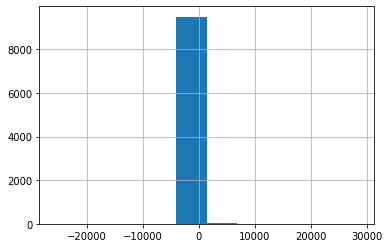

In [89]:
df_refdates['delta_referral_visit'].hist(bins=10)

In [90]:
l_essential = ['Identifier', 'ACPA', 'RF', 'CRP_raw', 'ESR_raw']

# Final selection contains off all people with infromation for these variables
l_missingLab = list(df_baseline[l_essential].dropna()['Identifier'])
df_final = df_baseline[~df_baseline['Identifier'].isin(l_missingLab)].copy()
df_final = df_final.reset_index(drop=True)

df_summary.loc[1] = generate_baseline_ref(df_final, 'Lab missing at baseline')

In [91]:
l_essential = ['Identifier', 'SJC', 'TJC']

# Final selection contains off all people with infromation for these variables
l_missingMannequin = list(df_baseline[l_essential].dropna()['Identifier'])
df_final = df_baseline[~df_baseline['Identifier'].isin(l_missingMannequin)].copy()
df_final = df_final.reset_index(drop=True)

df_summary.loc[2] = generate_baseline_ref(df_final, 'Mannequin missing at baseline')

### 3.2 Generate overview for final selection (complete data)

In [92]:
l_essential = ['Identifier', 'Sex', 'Age',  'FollowUp', 'ACPA', 'RF', 'CRP_raw', 'ESR_raw', 'SJC', 'TJC']

# Final selection contains off all people with infromation for these variables
df_final = df_baseline[df_baseline['Identifier'].isin(df_baseline[l_essential].dropna()['Identifier'])].copy()
df_final = df_final.reset_index(drop=True)

# Dropped patients
df_dropped = df_baseline[~df_baseline['Identifier'].isin(df_baseline[l_essential].dropna()['Identifier'])].copy()
df_dropped = df_dropped.reset_index(drop=True)

df_summary.loc[3] = generate_baseline_ref(df_final, 'Final selection')
df_summary.loc[4] = generate_baseline_ref(df_dropped, 'Dropped patients')

df_summary.T

,0,1,2,3,4
cluster,non RA population,Lab missing at baseline,Mannequin missing at baseline,Final selection,Dropped patients
N,5709.00,4557.00,8033.00,624.00,8246.00
DMARD [n(%)],572 (10.0),402 (8.8),800 (10.0),520 (83.3),964 (11.7)
"Sex, F [n(%)]",3859 (67.6),3071 (67.4),5441 (67.7),389 (62.3),5565 (67.5)
"Age (mean+-SD, yr)",53.5 (16.4),53.5 (16.7),53.8 (16.4),58.6 (15.2),53.9 (16.4)
BMI (mean+-SD),27.5 (5.4),27.6 (5.5),27.6 (5.3),27.3 (5.2),27.6 (5.3)
"Wait time, days (median+-IQR)",7.0 (2.0-14.0),7.0 (3.0-15.0),7.0 (2.0-14.0),7.0 (2.0-14.0),7.0 (2.0-14.0)
RF [n(%)],909 (33.3),80 (41.9),1343 (34.8),327 (52.4),1357 (35.0)
ACPA [n(%)],407 (14.9),39 (20.4),640 (16.6),254 (40.7),652 (16.8)
ESR (median+-IQR),10.0 (5.0-19.0),9.0 (5.0-18.0),10.0 (5.0-19.0),15.0 (7.0-28.5),10.0 (5.0-19.0)


### Export complete table

In [ ]:
df_compl =  df_baseline[((df_baseline['Identifier'].isin(l_missingMannequin)) & (~df_baseline['RF'].isna()) & (~df_baseline['ACPA'].isna()))]
df_compl = df_compl.reset_index(drop=True)

# Add joint location information
l_joints = [col for col in df_man.columns if ('S_' in col or 'ST_' in col or 'T_' in col)]
l_joints.append('Identifier')

df_compl = pd.merge(df_compl, df_man[l_joints], left_on='Identifier', right_on='Identifier')

df_compl.to_csv('../proc/ZWN_dmard_metadata_new.csv', index=None, sep=',')
df_compl = df_compl.fillna(0)
df_compl#[['SJC', 'TJC']]

### 3.3 Show Missingness

In [94]:
df_baseline[l_essential].isnull().sum()/len(df_baseline)*100

Identifier     0.000000
Sex            0.011274
Age            0.000000
FollowUp       0.000000
ACPA          49.222097
RF            49.222097
CRP_raw       15.140924
ESR_raw       16.324690
SJC           90.563698
TJC           90.563698
dtype: float64

<AxesSubplot:>

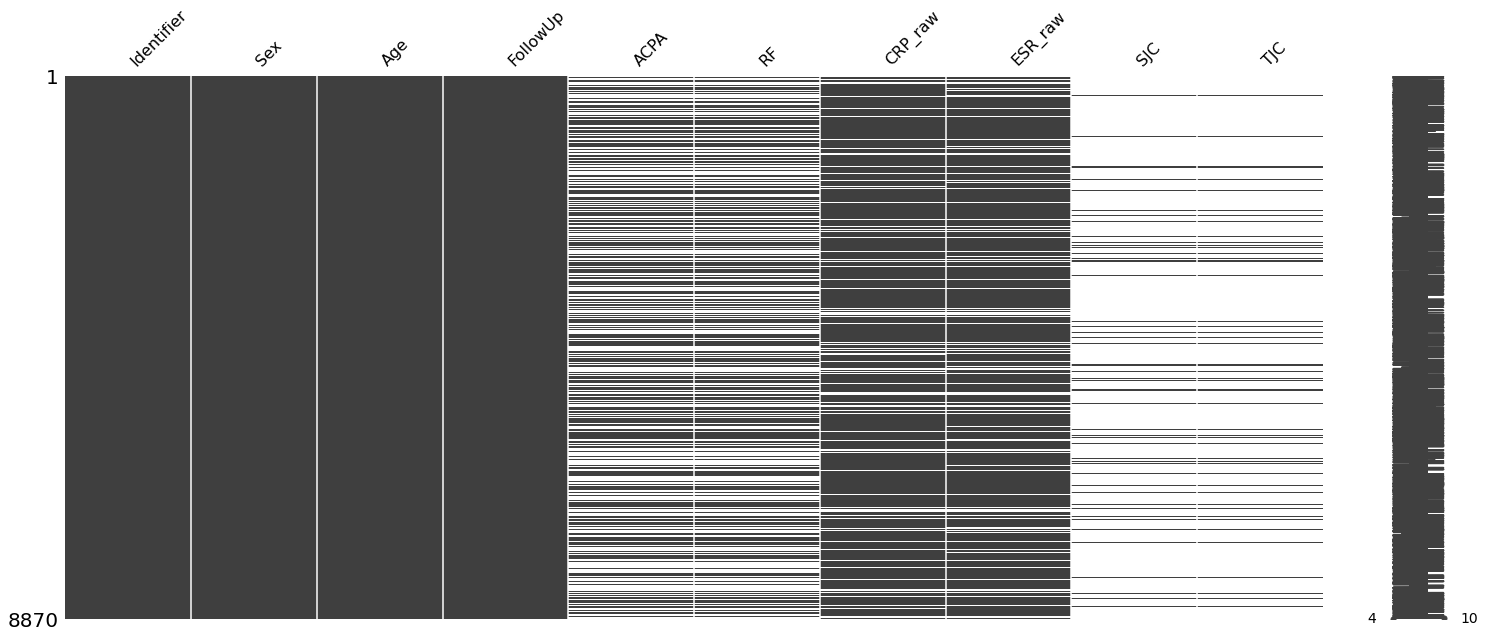

In [95]:
import missingno as msno
    
%matplotlib inline

# df_new[((~df_new['Anti-CCP'].isna()) & (~df_new['IgM reumafactor'].isna()))][l_keep].dropna(thresh=7)
msno.matrix(df_baseline[l_essential]) # check if patients that miss variables across lines -> have aCCP / RF of 2

### Prepare dataset for clustering

In [ ]:
import pandas as pd
df_demograph = pd.read_csv('../dict/Demographics_ALL.csv', sep=';', index=None)

l_pat_RA = pd.read_csv('../dict/list_ra_patients_icd.csv', sep=';', index=None)


df_demograph['FirstConsult'] = pd.to_datetime(df_demograph['FirstConsult'], format='%Y-%m-%d')
pt_RA = list(df_demograph[(df_demograph['Identifier'].isin(l_pat_RA))]['Identifier'])  
print('Nr of patients: %s (out of which %s have RA)' % (len(df_demograph), len(pt_RA)))
df_demograph['BMI'] = df_demograph['Identifier'].apply(lambda x : d_bmi[x] if x in d_bmi.keys() else np.nan)
df_demograph['Smoking'] = df_demograph['Identifier'].apply(lambda x : d_smoking[str(x)] if x in d_smoking.keys() else np.nan)
df_demograph['Alcohol'] = df_demograph['Identifier'].apply(lambda x : d_alcohol[str(x)] if x in d_alcohol.keys() else np.nan)
df_demograph['ESR'] = df_demograph['Identifier'].apply(lambda x : d_esr[x] if x in d_esr.keys() else np.nan)
df_demograph['ESR'] = df_demograph['ESR'].apply(lambda x: x.replace('<', '').replace('>', '') if type(x)==str else x)
df_demograph['ESR'] = df_demograph['ESR'].astype(float)
df_demograph['CRP'] = df_demograph['Identifier'].apply(lambda x : d_crp[x] if x in d_crp.keys() else np.nan)
df_demograph['CRP'] = df_demograph['CRP'].apply(lambda x: x.replace('<', '').replace('>', '') if type(x)==str else x)
df_demograph['CRP'] = df_demograph['CRP'].astype(float)
df_demograph['ACPA'] = df_demograph['Identifier'].apply(lambda x : d_aCCP[x] if x in d_aCCP.keys() else np.nan)
df_demograph['RF'] = df_demograph['Identifier'].apply(lambda x : d_rf[x] if x in d_rf.keys() else np.nan)
# Infer RF & ACPA
df_demograph['RF'] = df_demograph['RF'].apply(lambda x : func.infer_RF(x))#.iloc[3]
df_demograph['ACPA'] = df_demograph['ACPA'].apply(lambda x : func.infer_aCCP(x))

df_demograph['RA_case'] = df_demograph['Identifier'].apply(lambda x : 1 if x in pt_RA else 0)

df_rzw = df_demograph[df_demograph['Identifier'].isin(pt_RA)].copy()
print(len(df_rzw))

df_rzw = df_rzw.rename(columns = {'Geslacht':  'Sex', 'Leeftijd_Eerste_Afspraak' : 'Age'})
if 1 not in df_rzw['Sex'].unique():
    df_rzw['Sex'] = df_rzw['Sex'].replace({'F' : 1, 'M' : 0})
df_rzw['ACPA'] = df_rzw['ACPA'].replace({'Positief' : 1, 'Negatief' : 0})
df_rzw['RF'] = df_rzw['RF'].replace({'Positief' : 1, 'Negatief' : 0})

# Add joint location information
l_joints = [col for col in df_man.columns if ('S_' in col or 'ST_' in col or 'T_' in col)]
l_joints.append('Identifier')

df_rzw = pd.merge(df_rzw, df_man[l_joints], left_on='Identifier', right_on='Identifier')

# Export Extraction for Clustering
#df_rzw.to_csv('../extractions/20240205_Clustering/ZWN_clustering_variables.csv', sep=',', index=None)

df_rzw.head()

### Create table of dropped patients

In [29]:
import pandas as pd
df_demograph = pd.read_csv('../dict/Demographics_ALL.csv', sep=';')
#df_final = pd.read_csv('../extractions/20240205_Clustering/patient_selection_rzwn.csv', sep='|')
df_final =pd.read_csv('../proc/SummaryResponseTable_RZWN_wOutcome.csv')

l_pat_RA = pd.read_csv('../dict/list_ra_patients_icd.csv', sep=';')['Identifier'].values
l_pat_RA
l_pat_final = list(df_final['patnr'].unique())

In [49]:
import numpy as np

l_DAS28 = ['Pijn_pols L', 'Pijn_pols R', 'Pijn_pip 2 links hand', 'Pijn_pip 2 rechts hand', 'Pijn_pip 3 links hand', 'Pijn_pip 3 rechts hand',
 'Pijn_pip 4 links hand', 'Pijn_pip 4 rechts hand', 'Pijn_pip 5 links hand', 'Pijn_pip 5 rechts hand', 
 'Pijn_mcp 1 links', 'Pijn_mcp 1 rechts', 'Pijn_mcp 2 links', 'Pijn_mcp 2 rechts', 'Pijn_mcp 3 links', 'Pijn_mcp 3 rechts',
 'Pijn_mcp 4 links', 'Pijn_mcp 4 rechts', 'Pijn_mcp 5 links', 'Pijn_mcp 5 rechts', 'Pijn_schouder L', 'Pijn_schouder R', 'Pijn_Elleboog L','Pijn_elleboog R',
 'Pijn_knie links', 'Pijn_knie rechts', 
           
 'Zwelling_pols L', 'Zwelling_pols R', 'Zwelling_pip 2 links hand',  'Zwelling_pip 2 rechts hand',
 'Zwelling_pip 3 links hand',  'Zwelling_pip 3 rechts hand', 'Zwelling_pip 4 links hand', 'Zwelling_pip 4 rechts hand',  'Zwelling_pip 5 links hand',
 'Zwelling_pip 5 rechts hand',  'Zwelling_mcp 1 links', 'Zwelling_mcp 1 rechts', 'Zwelling_mcp 2 links', 'Zwelling_mcp 2 rechts', 'Zwelling_mcp 3 links', 'Zwelling_mcp 3 rechts',
 'Zwelling_mcp 4 links', 'Zwelling_mcp 4 rechts', 'Zwelling_mcp 5 links', 'Zwelling_mcp 5 rechts', 
 'Zwelling_knie links', 'Zwelling_knie rechts', 'Zwelling_schouder L', 'Zwelling_schouder R', 'Zwelling_Elleboog L',
  'Zwelling_elleboog R',
               
               #  'Pijn_IP links', 'Pijn_IP rechts',  'Zwelling_IP links', 'Zwelling_IP rechts',
                   ]
l_DAS44 = l_DAS28 + [ 'Zwelling_sternoclaviculair L', 'Zwelling_sternoclaviculair R', 'Pijn_sternoclaviculair L', 'Pijn_sternoclaviculair R',
               'Zwelling_acromioclaviaculair L', 'Zwelling_acromioclaviaculair R', 'Pijn_acromioclaviaculair L', 'Pijn_acromioclaviaculair R',
                    'Pijn_onderste spronggewricht links', 'Pijn_onderste spronggewricht rechts', 'Pijn_bovenste spronggewicht links', 'Pijn_bovenste spronggewricht rechts',
             'Zwelling_onderste spronggewricht links', 'Zwelling_onderste spronggewricht rechts', 'Zwelling_bovenste spronggewicht links', 'Zwelling_bovenste spronggewricht rechts',
                'Pijn_mtp 2 links', 'Pijn_mtp 2 rechts', 'Pijn_mtp 3 links', 'Pijn_mtp 3 rechts', 'Pijn_mtp 4 links', 'Pijn_mtp 4 rechts',
 'Pijn_mtp 5 links', 'Pijn_mtp 5 rechts','Zwelling_mtp 2 links', 'Zwelling_mtp 2 rechts', 'Zwelling_mtp 3 links', 'Zwelling_mtp 3 rechts', 'Zwelling_mtp 4 links', 'Zwelling_mtp 4 rechts',
 'Zwelling_mtp 5 links', 'Zwelling_mtp 5 rechts',
              ]
    
metadata_rep = pd.read_csv('../extractions/20240205_Clustering/metadata_rzwn.csv', sep='|')

d_tjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Pijn' in col]].sum(axis=1)))
d_sjc44= dict(zip(metadata_rep['PATNR'], metadata_rep[[col for col in l_DAS44 if 'Zwelling' in col]].sum(axis=1)))

def IQR(data):
    # First quartile (Q1)
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
   
    # Interquaritle range (IQR)
    iqr = Q3 - Q1
    return [Q1, Q3]
#'Wait time, days (median+-IQR)', 
df_summary = pd.DataFrame(columns=['cluster', 'N', 'DMARD [n(%)]', 'Sex, F [n(%)]','Age (mean+-SD, yr)', 'BMI (mean+-SD)', 'RF [n(%)]', 'ACPA [n(%)]', 'ESR (median+-IQR)', 'CRP (median+-IQR)', 'SJC (median+-IQR)','TJC (median+-IQR)',  'Visits (median+-IQR)', 'Follow Up (median+-IQR)', 'RF_na [n(%)]','ACPA_na [n(%)]', 'ESR_na [n(%)]' , 'CRP_na [n(%)]', 'SJC_na [n(%)]' , 'TJC_na [n(%)]', 'BMI_na [n(%)]', 'DAS44', 'DAS28', 'DAS44_na [n(%)]' , 'DAS28_na [n(%)]' ]) #TreatSwitch [n(%)]', 

def generate_baseline_ref(df_baseline, name = 'All'):
    return [name, '%.2f' % len(df_baseline['Identifier'].unique()), 
     '%.0f (%.1f)' % (len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]), (max(0.00001, len(df_baseline[~df_baseline['FirstDMARD_date'].isna()]))/len(df_baseline))*100),
     '%.0f (%.1f)' % (np.sum(df_baseline['Sex']), np.mean(df_baseline['Sex']) * 100),  '%.1f (%.1f)' % (np.mean(df_baseline['Age']), np.std(df_baseline['Age'])), 
     '%.1f (%.1f)' % (np.mean(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw']), np.std(df_baseline[~df_baseline['BMI_raw'].isna()]['BMI_raw'])),
     #'%.1f (%.1f-%.1f)' % (np.median(df_baseline['deltaref']), IQR(df_baseline['deltaref'])[0], IQR(df_baseline['deltaref'])[1]), 
     '%.0f (%.1f)' % (np.sum(df_baseline['RF']), np.mean(df_baseline['RF']) * 100), 
     '%.0f (%.1f)' % (np.sum(df_baseline['ACPA']), np.mean(df_baseline['ACPA']) * 100),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw']), IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[0], IQR(df_baseline[~df_baseline['ESR_raw'].isna()]['ESR_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw']), IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[0], IQR(df_baseline[~df_baseline['CRP_raw'].isna()]['CRP_raw'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['SJC'].isna()]['SJC']), IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[0], IQR(df_baseline[~df_baseline['SJC'].isna()]['SJC'])[1]) if len(df_baseline[~df_baseline['SJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['TJC'].isna()]['TJC']), IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[0], IQR(df_baseline[~df_baseline['TJC'].isna()]['TJC'])[1]) if len(df_baseline[~df_baseline['TJC'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline['Visits']), IQR(df_baseline['Visits'])[0], IQR(df_baseline['Visits'])[1]),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline['FollowUp']), IQR(df_baseline['FollowUp'])[0], IQR(df_baseline['FollowUp'])[1]),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['RF'].isna()]), (len(df_baseline[df_baseline['RF'].isna()])/len(df_baseline))*100), '%.0f (%.1f)' % (len(df_baseline[df_baseline['ACPA'].isna()]), (len(df_baseline[df_baseline['ACPA'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['ESR_raw'].isna()]), (len(df_baseline[df_baseline['ESR_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['CRP_raw'].isna()]), (len(df_baseline[df_baseline['CRP_raw'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['SJC'].isna()]), (len(df_baseline[df_baseline['SJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['TJC'].isna()]), (len(df_baseline[df_baseline['TJC'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['BMI_raw'].isna()]), (len(df_baseline[df_baseline['BMI_raw'].isna()])/len(df_baseline))*100),
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['DAS44'].isna()]['DAS44']), IQR(df_baseline[~df_baseline['DAS44'].isna()]['DAS44'])[0], IQR(df_baseline[~df_baseline['DAS44'].isna()]['DAS44'])[1]) if len(df_baseline[~df_baseline['DAS44'].isna()]) > 0 else 0,
     '%.1f (%.1f-%.1f)' % (np.median(df_baseline[~df_baseline['DAS28'].isna()]['DAS28']), IQR(df_baseline[~df_baseline['DAS28'].isna()]['DAS28'])[0], IQR(df_baseline[~df_baseline['DAS28'].isna()]['DAS28'])[1]) if len(df_baseline[~df_baseline['DAS28'].isna()]) > 0 else 0,
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['DAS44'].isna()]), (len(df_baseline[df_baseline['DAS44'].isna()])/len(df_baseline))*100),
     '%.0f (%.1f)' % (len(df_baseline[df_baseline['DAS28'].isna()]), (len(df_baseline[df_baseline['DAS28'].isna()])/len(df_baseline))*100),
           
           ]

def calculate_DAS44(tjc, sjc, esr):
    """
    Calculate DAS44 with 3 variables : RAI, SJC and ESR (BSE)
    """

    das44= (0.53938 * np.sqrt(tjc) + 0.0650 * (sjc) + 0.330 * np.log(esr)) + 0.224 #0.224
    return das44

def calculate_DAS28(tjc, sjc, esr):
    """
    Calculate DAS28 with 3 variables : TJC, SJC and ESR (BSE)
    """
    das28 = (0.56 * np.sqrt(tjc) + 0.28 * np.sqrt(sjc) + 0.70 * np.log(esr)) * 1.08 + 0.16
    return das28

df_demograph['DAS44'] = df_demograph.apply(lambda x : calculate_DAS44(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)
df_demograph['DAS28'] = df_demograph.apply(lambda x : calculate_DAS28(x['SJC'], x['TJC'], x['ESR_raw']), axis=1)

# select non RA 
nonFinal = df_demograph[((~df_demograph['FirstDMARD_date'].isna()) & (df_demograph['Identifier'].isin(l_pat_RA)) & (~df_demograph['Identifier'].isin(l_pat_final)))].drop_duplicates(subset=['Identifier'])
RA = df_demograph[((~df_demograph['FirstDMARD_date'].isna()) & (df_demograph['Identifier'].isin(l_pat_final)))].drop_duplicates(subset=['Identifier'])



df_summary.loc[0] = generate_baseline_ref(nonFinal, 'inComplete')
df_summary.loc[1] = generate_baseline_ref(RA, 'Complete')

df_summary = df_summary.reset_index(drop=True)
df_summary.T

,0,1
cluster,inComplete,Complete
N,712.00,515.00
DMARD [n(%)],712 (100.0),515 (100.0)
"Sex, F [n(%)]",455 (63.9),333 (64.7)
"Age (mean+-SD, yr)",62.4 (14.0),60.9 (14.1)
BMI (mean+-SD),27.1 (4.9),27.0 (5.0)
RF [n(%)],206 (67.5),267 (61.1)
ACPA [n(%)],157 (51.5),216 (49.4)
ESR (median+-IQR),15.0 (8.0-29.0),16.0 (8.0-27.0)
CRP (median+-IQR),4.0 (2.8-16.0),6.0 (4.0-19.0)


<AxesSubplot:>

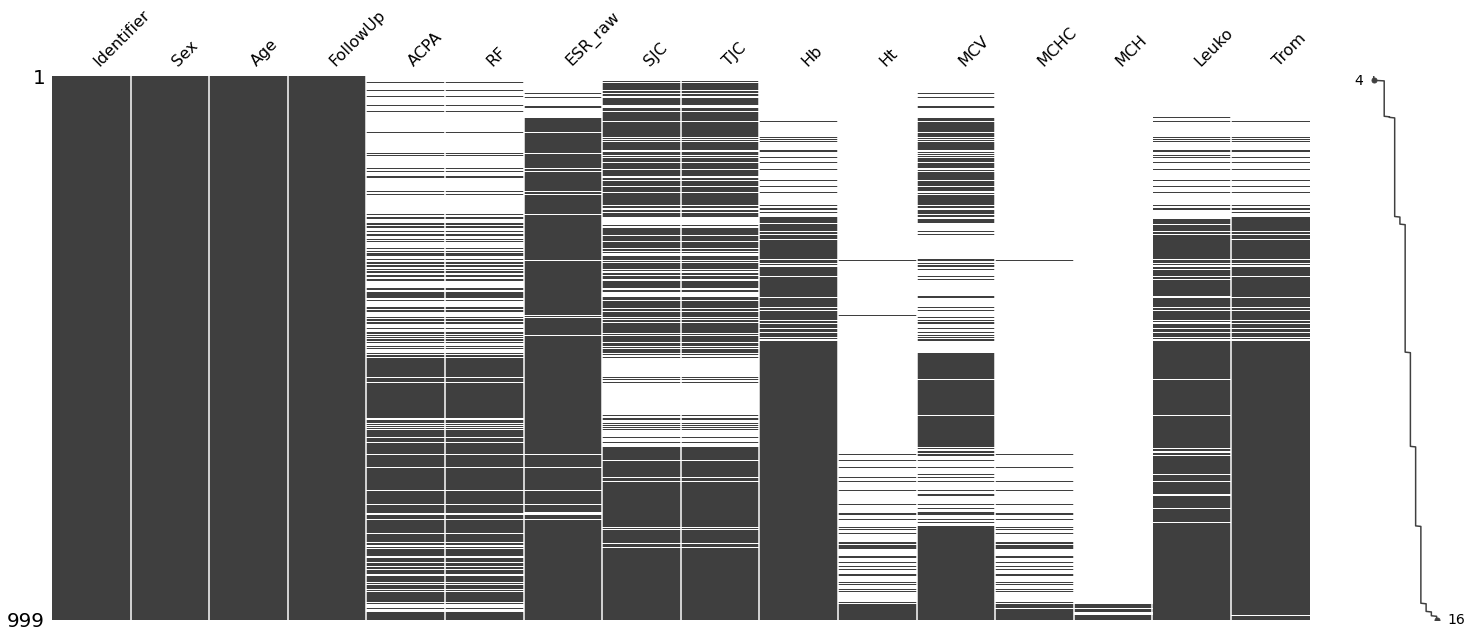

In [28]:
import missingno as msno

l_essential = ['Identifier', 'Sex', 'Age',  'FollowUp', 'ACPA', 'RF', 'ESR_raw', 'SJC', 'TJC', 'Hb', 'Ht','MCV',  'MCHC', 'MCH', 'Leuko', 'Trom']

msno.matrix(msno.nullity_sort(nonFinal[l_essential],
    sort='ascending'))
